In [2]:
# Imports
import PySimpleGUI as sg
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import os
import scipy
import numpy as np
from PIL import Image, ImageTk


In [24]:
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
file_path = os.path.join(parent_directory, "model", "monkey_data.mat")
mat_data = scipy.io.loadmat(file_path)
mvm_data = mat_data['targ'][0][0]
print(mvm_data.shape)
print(file_path)

print(type(mvm_data))
mvm_data = mvm_data.T
mvm_data.shape
time = np.arange(0, 2.98, .01)
time = time.T.reshape((298,1))
print(time.shape)
full = np.concatenate((time, mvm_data), axis = 1)

df = pd.DataFrame(full, columns = ['time', 'DELT1', 'DELT2', 'DELT3', 'SUPRA', 'INFRA', 'SUBSCAP', 'TMIN', 'TMAJ',
                                 'PMAJ1', 'PMAJ2', 'PMAJ3', 'LAT1', 'LAT2', 'LAT3','CORB', 'TRIlong', 'TRIllat', 'TRIlmat', 
                                    'ANC', 'SUP', 'BIClong', 'BICshort', 'BRA', 'BRD', 'ECRL', 'ECRB', 'ECU', 'FCR', 'FCU', 
                                     'PL', 'PT', 'PQ', 'FDSL', 'FDSR', 'FDSM', 'FDSI', 'FDPL', 'FDPR', 'FDPM', 'FDPI',
                                     'EDCL','EDCR', 'EDCM', 'EDCI', 'EDM', 'EIP', 'EPL', 'EPB', 'FPL', 'APL'])

df.to_csv('mvm_data', sep = "\t", index = False)
df.head()





(50, 298)
/Users/virginiawang/Library/CloudStorage/OneDrive-Personal/UW/CSE481_Capstone/model/monkey_data.mat
<class 'numpy.ndarray'>
(298, 1)


,time,DELT1,DELT2,DELT3,SUPRA,INFRA,SUBSCAP,TMIN,TMAJ,PMAJ1,...,EDCL,EDCR,EDCM,EDCI,EDM,EIP,EPL,EPB,FPL,APL
0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


NameError: name 'ImageTK' is not defined

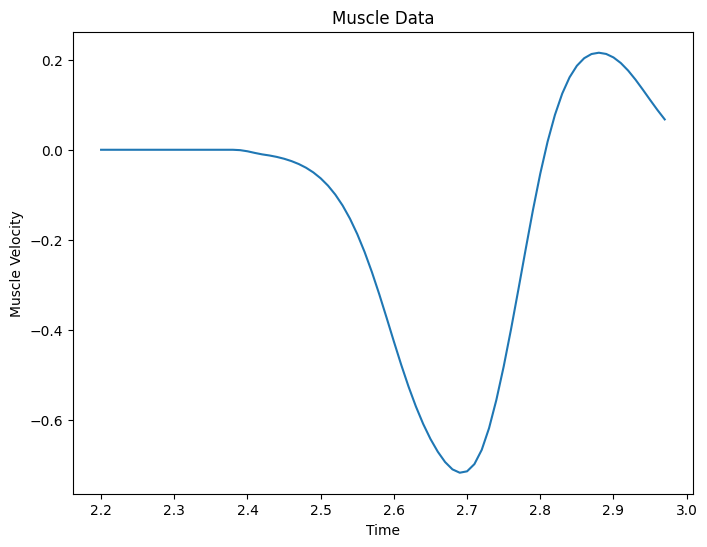

: 

In [5]:
muscle_list = ['DELT1', 'DELT2', 'DELT3', 'SUPRA', 'INFRA', 'SUBSCAP', 'TMIN', 'TMAJ',
                                 'PMAJ1', 'PMAJ2', 'PMAJ3', 'LAT1', 'LAT2', 'LAT3','CORB', 'TRIlong', 'TRIllat', 'TRIlmat', 
                                    'ANC', 'SUP', 'BIClong', 'BICshort', 'BRA', 'BRD', 'ECRL', 'ECRB', 'ECU', 'FCR', 'FCU', 
                                     'PL', 'PT', 'PQ', 'FDSL', 'FDSR', 'FDSM', 'FDSI', 'FDPL', 'FDPR', 'FDPM', 'FDPI',
                                     'EDCL','EDCR', 'EDCM', 'EDCI', 'EDM', 'EIP', 'EPL', 'EPB', 'FPL', 'APL']

# Sample DataFrame
df = pd.DataFrame(data=[[i]*50 for i in range(298)])

# Get monkey data using relative path of gui file
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
file_path = os.path.join(parent_directory, "model", "monkey_data.mat")

# Load the .mat file
mat_data = scipy.io.loadmat(file_path)
mvm_data = mat_data['targ'][0][0]
time_axis = np.arange(2.2, 2.98, .01)

# Function to plot data
def plot_data(data):
    data = data[220:]
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(time_axis, data)
    ax.set_xlabel('Time')
    ax.set_ylabel('Muscle Velocity')
    ax.set_title('Muscle Data')
    return fig

muscle_folder_path = os.path.join(parent_directory, 'muscles')
def muscle_image(muscle_name):
    if muscle_name is None:
        muscle_name = 'DELT1'
    muscle_file_path = os.path.join(muscle_folder_path, 'DELT1' + '.png')


    im = Image.open(muscle_file_path)
    # im - im.resize(300,300)

    return ImageTK.PhotoImage(image = im)
# Define the layout of the GUI
# %% New Layout
left_column = [

    [sg.Canvas(size=(640, 480), key='-CANVAS-')],
    [sg.Combo(muscle_list, key = '-MUSCLES-'), sg.Image(size=(300, 300), key='-IMAGE-')],
]

# %% Old Layout
left_colum = [
    [sg.Button("All 50 Muscles")],
    [sg.Button("Single Muscle")], 
]

right_column = [
    # [sg.Canvas(size=(640, 480), key='-CANVAS-')],
    [sg.Slider(range=(0, 50), orientation='h', size=(100, 20), default_value=0, key='-SLIDER-', enable_events = True)],
]

layout = [ [[sg.Text("Neuro Engineering Capstone", font='Any 20 bold')]],
    [sg.Column(left_column), sg.VSeperator(), sg.Column(right_column)], 
]

# Create the GUI window
window = sg.Window('DataFrame Plotter', layout)

# Initialize canvas and fig
canvas_elem = window['-CANVAS-']
fig = None
canvas = None

# Event loop
while True:
    event, values = window.read()

    if event == sg.WINDOW_CLOSED or event == 'Exit':
        if fig is not None:
            plt.close(fig)  # Close the figure to prevent it from being printed
        break
        break
    elif event == 'All 50 Muscles':
        fig = plot_data(mvm_data.T)  # Plot all rows
    elif event == 'Single Muscle':
        fig = plot_data(mvm_data[int(values['-SLIDER-'])].T)  # Plot only the first row
    if event == '-SLIDER-':
        fig = plot_data(mvm_data[int(values['-SLIDER-'])].T)  # Plot only the first row
        image = muscle_image(values['-MUSCLES-'])

    # Update the plot in the GUI
    if fig is not None:
        if canvas:
            canvas.get_tk_widget().pack_forget()  # Remove the previous canvas
        canvas = FigureCanvasTkAgg(fig, canvas_elem.TKCanvas)
        canvas.draw()
        canvas.get_tk_widget().pack(side='top', fill='both', expand=1)
        window['-IMAGE-'].update(data=image)

window.close()


In [ ]:
'DELT1', 




'DELT2', 




'DELT3', 




'SUPRA'